In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [4]:
train.shape

(39609, 23)

In [5]:
len(train['사고유형'])

39609

In [6]:
train.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


In [7]:
train.shape

(39609, 23)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [9]:
sample = train.drop(columns = ['ID','사고일시','시군구','사고유형','사고유형 - 세부분류'])

In [10]:
sample[sample.사망자수 == 1]

,요일,기상상태,도로형태,노면상태,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
95,금요일,맑음,단일로 - 기타,건조,안전운전불이행,화물,남,26세,상해없음,보행자,여,57세,사망,1,0,0,0,10
127,토요일,맑음,기타 - 기타,건조,안전운전불이행,화물,남,75세,사망,화물,남,57세,경상,1,0,1,0,13
164,일요일,맑음,교차로 - 교차로안,건조,과속,이륜,남,52세,사망,특수,남,58세,상해없음,1,0,0,0,10
187,월요일,맑음,단일로 - 기타,건조,안전운전불이행,화물,남,68세,상해없음,보행자,여,80세,사망,1,0,0,0,10
640,일요일,맑음,단일로 - 기타,건조,안전운전불이행,승용,남,75세,상해없음,보행자,남,68세,사망,1,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38831,월요일,맑음,교차로 - 교차로안,건조,신호위반,원동기,남,16세,중상,승용,남,62세,경상,1,1,1,0,18
38835,월요일,맑음,단일로 - 기타,건조,안전운전불이행,승합,남,61세,상해없음,보행자,남,39세,사망,1,0,0,0,10
38936,금요일,맑음,단일로 - 기타,건조,안전운전불이행,화물,남,53세,상해없음,보행자,여,85세,사망,1,0,0,0,10
38997,일요일,맑음,교차로 - 교차로안,건조,안전운전불이행,승용,남,56세,상해없음,보행자,남,48세,사망,1,0,0,0,10


<AxesSubplot:>

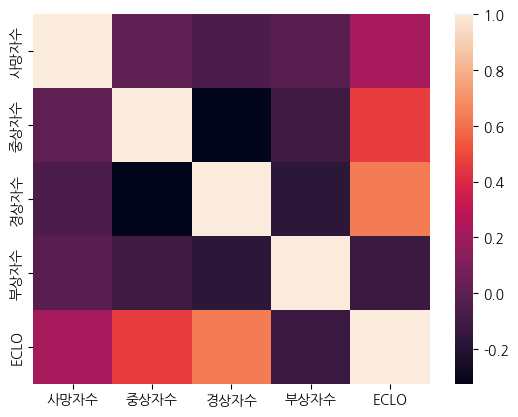

In [11]:
sns.heatmap(sample.corr())

In [12]:
train['법규위반'].value_counts()

안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: 법규위반, dtype: int64

In [13]:
for i in range(23):
    col = train.iloc[:,i].value_counts()
    print(col)


ACCIDENT_00000    1
ACCIDENT_26408    1
ACCIDENT_26401    1
ACCIDENT_26402    1
ACCIDENT_26403    1
                 ..
ACCIDENT_13205    1
ACCIDENT_13206    1
ACCIDENT_13207    1
ACCIDENT_13208    1
ACCIDENT_39608    1
Name: ID, Length: 39609, dtype: int64
2019-11-15 18    13
2019-03-21 15    11
2020-01-06 18    11
2020-09-11 19    11
2019-12-20 18    10
                 ..
2020-12-15 17     1
2020-12-15 16     1
2019-10-29 20     1
2020-12-15 10     1
2021-12-31 23     1
Name: 사고일시, Length: 18057, dtype: int64
금요일    6179
화요일    6023
수요일    5969
월요일    5895
목요일    5759
토요일    5670
일요일    4114
Name: 요일, dtype: int64
맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: 기상상태, dtype: int64
대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: 시군구, Length: 199, d

<AxesSubplot:xlabel='ECLO', ylabel='기상상태'>

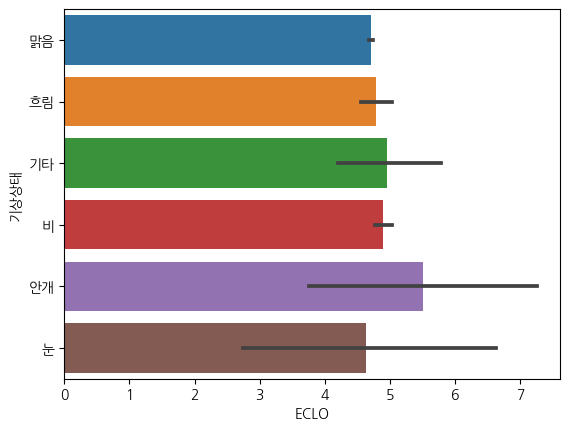

In [14]:
sns.barplot(data = train, x='ECLO', y = '기상상태', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='도로형태'>

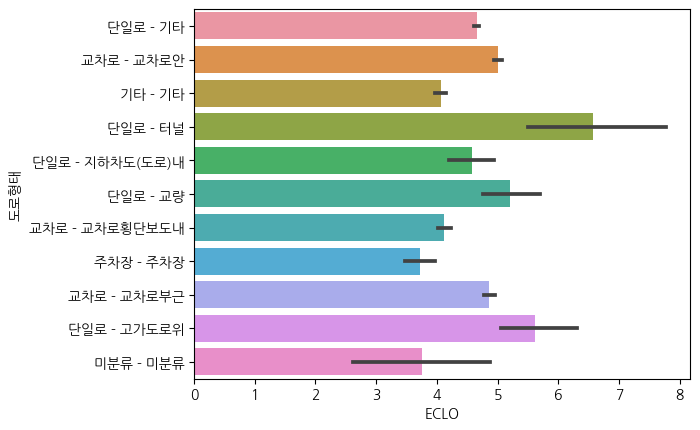

In [15]:
sns.barplot(data = train, x='ECLO', y = '도로형태', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='노면상태'>

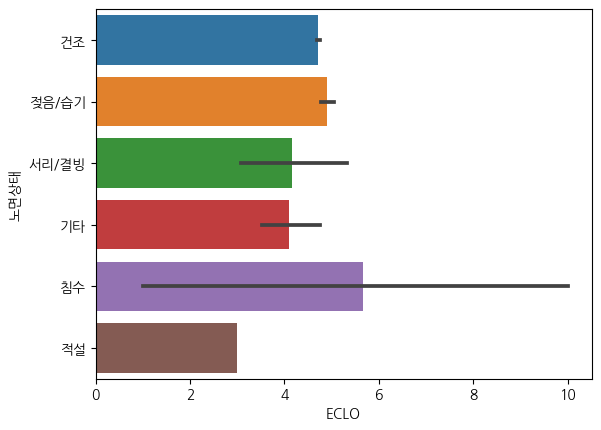

In [16]:
sns.barplot(data = train, x='ECLO', y = '노면상태', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='사고유형'>

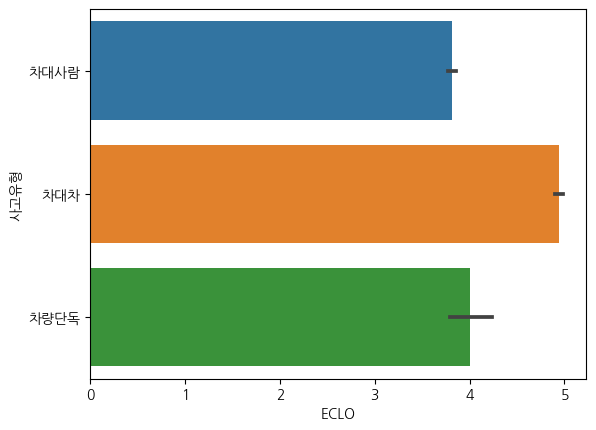

In [17]:
sns.barplot(data = train, x='ECLO', y = '사고유형', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='사고유형 - 세부분류'>

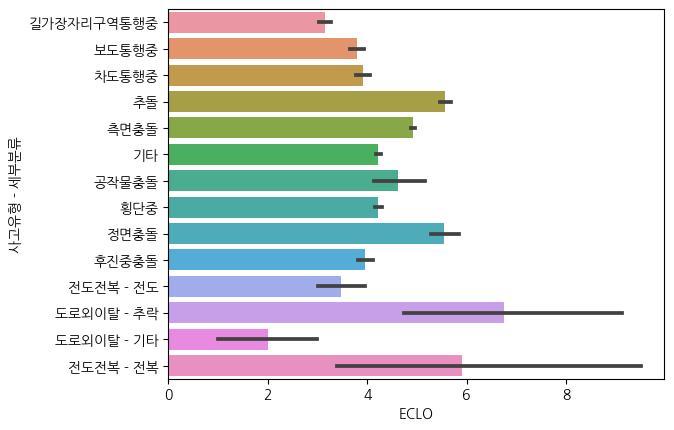

In [18]:
sns.barplot(data = train, x='ECLO', y = '사고유형 - 세부분류', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='법규위반'>

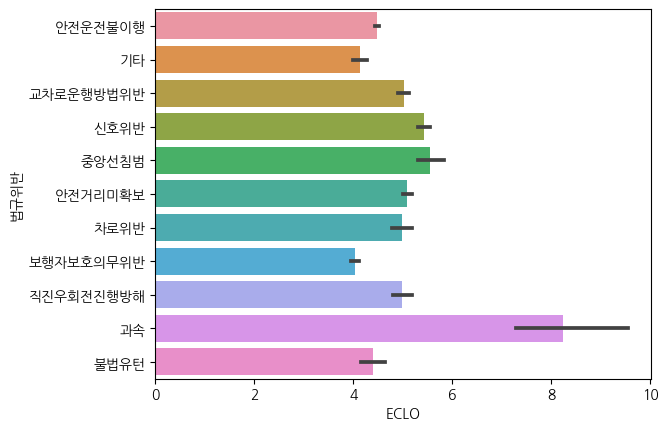

In [19]:
sns.barplot(data = train, x='ECLO', y = '법규위반', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='가해운전자 차종'>

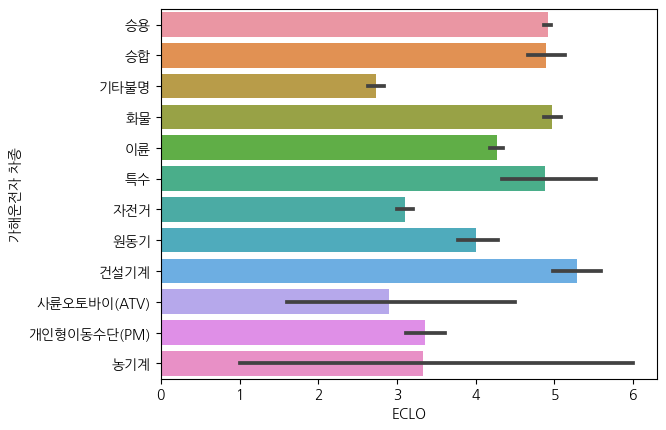

In [20]:
sns.barplot(data = train, x='ECLO', y = '가해운전자 차종', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='가해운전자 성별'>

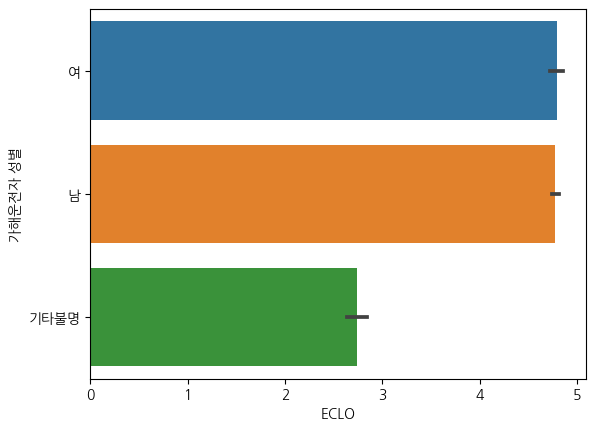

In [21]:
sns.barplot(data = train, x='ECLO', y = '가해운전자 성별', orient = 'h')

<AxesSubplot:xlabel='ECLO', ylabel='가해운전자 연령'>

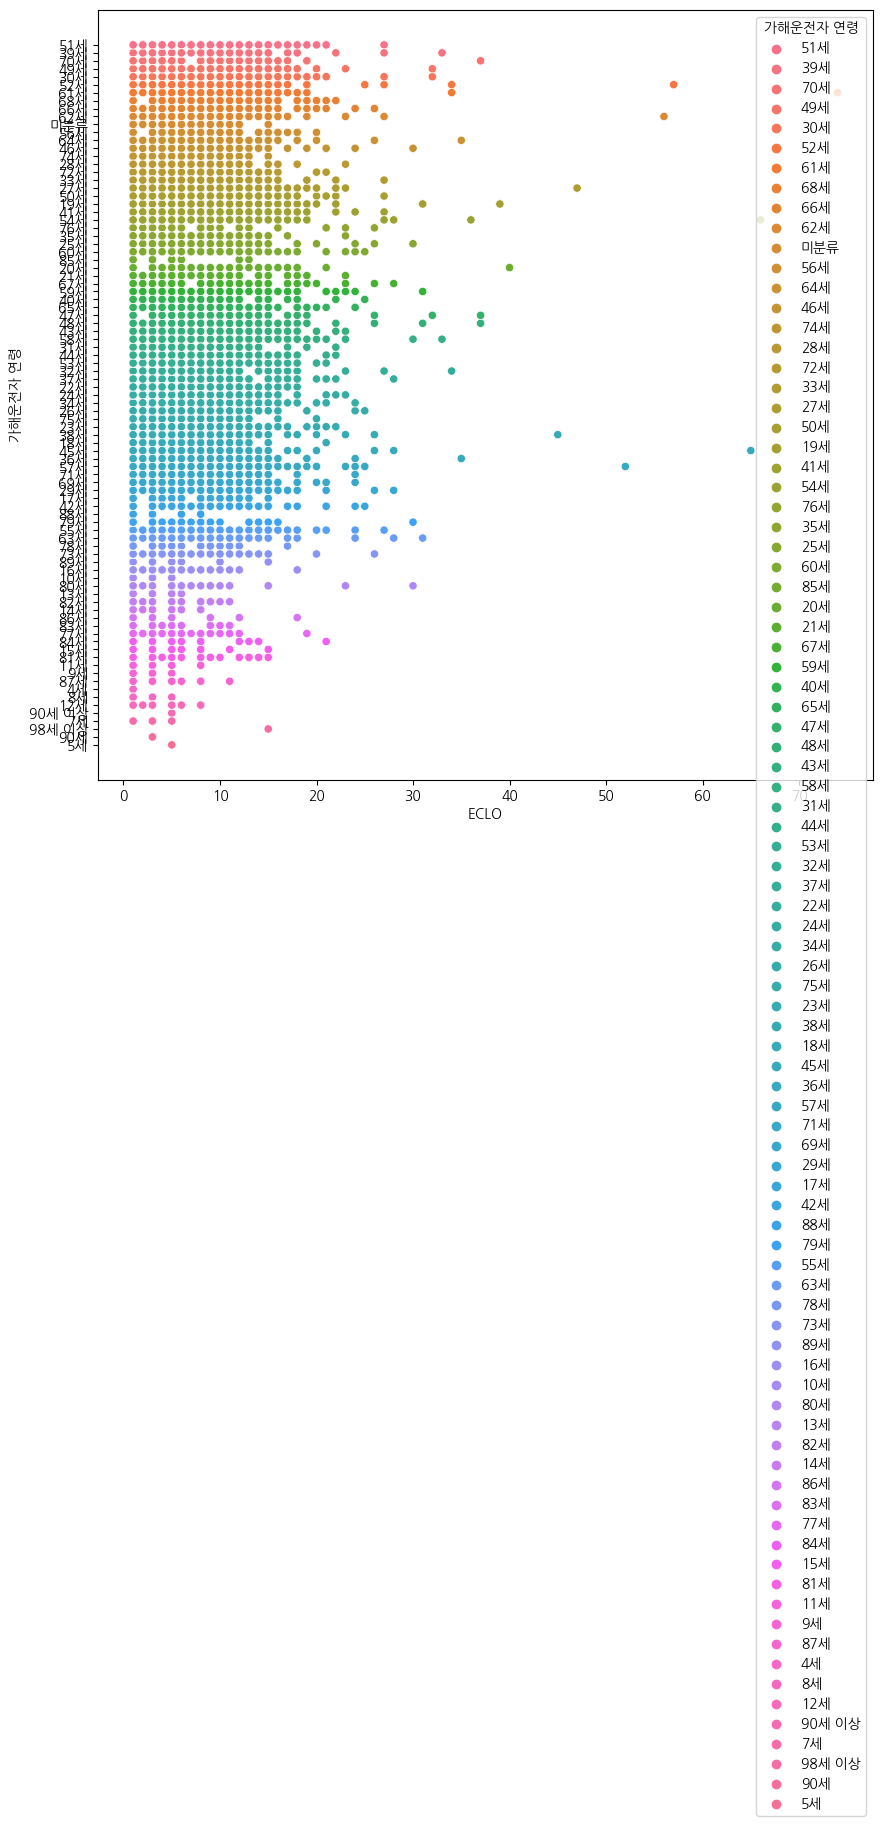

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="ECLO",y="가해운전자 연령",data=train, hue="가해운전자 연령")

In [23]:
# for i in range(39609):
#     condition = train['가해운전자 연령'] == 'NaN'
#     train.loc[condition, '가해운전자 연령'] = 0

In [24]:
# for k in range(10):
#     for i in range(39609):
#         condition = train['가해운전자 연령'] > k*10 and train['가해운전자 연령'] <= (k+1)*10
#         train.loc[condition, '가해운전자 연령'] = k

In [25]:
dtrain = train.dropna()

In [26]:
dtrain.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [27]:
dtrain.head(10)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
5,ACCIDENT_00005,2019-01-01 04,화요일,맑음,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,35세,경상,0,0,2,0,6
6,ACCIDENT_00006,2019-01-01 05,화요일,맑음,대구광역시 수성구 지산동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,경상,승용,남,76세,경상,0,0,6,0,18
7,ACCIDENT_00007,2019-01-01 06,화요일,흐림,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,53세,경상,0,0,1,0,3
8,ACCIDENT_00008,2019-01-01 06,화요일,맑음,대구광역시 북구 태전동,기타 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,자전거,남,62세,중상,0,1,0,0,5
9,ACCIDENT_00009,2019-01-01 10,화요일,맑음,대구광역시 동구 지묘동,단일로 - 터널,건조,차대차,기타,신호위반,...,상해없음,승용,여,42세,경상,0,0,3,0,9


In [28]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38618 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38618 non-null  object
 1   사고일시         38618 non-null  object
 2   요일           38618 non-null  object
 3   기상상태         38618 non-null  object
 4   시군구          38618 non-null  object
 5   도로형태         38618 non-null  object
 6   노면상태         38618 non-null  object
 7   사고유형         38618 non-null  object
 8   사고유형 - 세부분류  38618 non-null  object
 9   법규위반         38618 non-null  object
 10  가해운전자 차종     38618 non-null  object
 11  가해운전자 성별     38618 non-null  object
 12  가해운전자 연령     38618 non-null  object
 13  가해운전자 상해정도   38618 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         38618 non-null  int64 
 19  중상자수         38618 non-nu

In [29]:
dtrain.기상상태.unique()

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

In [30]:
weather_map = {
    '기타': 0,
    '맑음' : 1,
    '흐림' : 2,
    '비' : 3,
    '안개' : 4,
    '눈' : 5
}

In [31]:
dtrain.loc[:,'기상상태'] = dtrain['기상상태'].map(weather_map)

C:\Users\ediso\AppData\Local\Temp\ipykernel_4020\2898824033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain.loc[:,'기상상태'] = dtrain['기상상태'].map(weather_map)


In [32]:
dtrain.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,1,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,2,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,1,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,1,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,1,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


<AxesSubplot:>

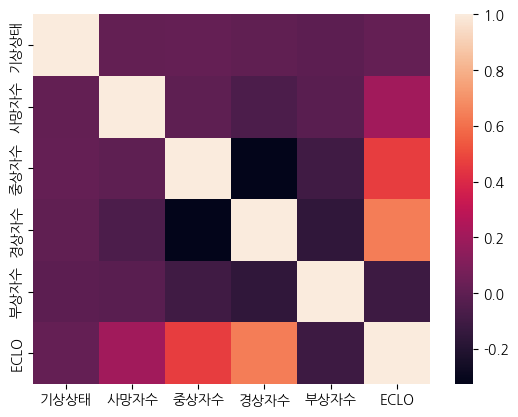

In [33]:
sns.heatmap(dtrain.corr())

In [34]:
dtrain.도로형태.unique()

array(['단일로 - 기타', '교차로 - 교차로안', '기타 - 기타', '단일로 - 터널', '단일로 - 지하차도(도로)내',
       '교차로 - 교차로횡단보도내', '주차장 - 주차장', '교차로 - 교차로부근', '단일로 - 고가도로위',
       '단일로 - 교량', '미분류 - 미분류'], dtype=object)